In [ ]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("caret")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Import the Dataset
data = read.csv("Dataset 01.csv")

In [ ]:
data $ sunrise = as.Date(data$sunrise, formate = "%Y-%m-%d")
data $ sunset = as.Date(data$sunset, formate = "%Y-%m-%d")

In [ ]:
data $ time = as.Date(data$time, formate = "%Y-%m-%d")

In [ ]:
head(data)

,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,⋯,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city
,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<date>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,2010-01-01,2,30.0,22.7,26.1,34.4,25.2,29.2,2010-01-01,2010-01-01,⋯,0,11.7,27.4,20,4.58,7,79.89999,16,Sri Lanka,Colombo
2,2010-01-02,51,29.9,23.5,26.2,33.8,26.2,29.8,2010-01-02,2010-01-02,⋯,1,13.0,27.0,24,3.84,7,79.89999,16,Sri Lanka,Colombo
3,2010-01-03,51,29.5,23.2,26.0,34.3,26.3,29.9,2010-01-03,2010-01-03,⋯,3,12.3,27.4,16,3.65,7,79.89999,16,Sri Lanka,Colombo
4,2010-01-04,2,28.9,21.9,25.3,31.6,23.4,27.8,2010-01-04,2010-01-04,⋯,0,17.0,34.6,356,3.79,7,79.89999,16,Sri Lanka,Colombo
5,2010-01-05,1,28.1,21.3,24.5,30.1,23.1,26.1,2010-01-05,2010-01-05,⋯,0,18.7,37.1,355,4.97,7,79.89999,16,Sri Lanka,Colombo
6,2010-01-06,2,28.7,21.3,25.0,31.2,22.9,26.6,2010-01-06,2010-01-06,⋯,0,17.1,32.0,12,4.89,7,79.89999,16,Sri Lanka,Colombo


In [ ]:
# Data Preparation
library(tidyverse)
roi_data <- data %>%
  mutate(hours_between_sunrise_sunset = as.numeric(difftime(sunset, sunrise, units = "hours")),
         score = (0.5 * (shortwave_radiation_sum + windspeed_10m_max - temperature_2m_mean - rain_sum - precipitation_hours - elevation)) +
                 (0.1 * hours_between_sunrise_sunset)) %>%
  select(city, temperature_2m_mean, hours_between_sunrise_sunset,
         shortwave_radiation_sum, rain_sum, precipitation_hours,
         windspeed_10m_max, elevation, score) %>%
  drop_na()  # Drop rows with missing values

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
# Find the city with the highest score
highest_score_city <- roi_data %>%
  filter(score == max(score)) %>%
  select(city, score)

In [ ]:
# Print the city with the highest score
cat("City with the highest score:", highest_score_city$city, "\n")
cat("Highest score:", highest_score_city$score, "\n")

City with the highest score: Jaffna 
Highest score: 19.57 


In [ ]:
# Data Preparation
roi_data <- data %>%
  mutate(hours_between_sunrise_sunset = as.numeric(difftime(sunset, sunrise, units = "hours")),
         score = (0.5 * (shortwave_radiation_sum + windspeed_10m_max - temperature_2m_mean - rain_sum - precipitation_hours - elevation)) +
                 (0.1 * hours_between_sunrise_sunset)) %>%
  select(city, temperature_2m_mean, hours_between_sunrise_sunset,
         shortwave_radiation_sum, rain_sum, precipitation_hours,
         windspeed_10m_max, elevation, score) %>%
  drop_na()  # Drop rows with missing values


In [ ]:
# Encode 'city' as a factor
roi_data$city <- as.factor(roi_data$city)

In [ ]:
# Split data into training and testing sets
set.seed(123)
train_index <- createDataPartition(roi_data$city, p = 0.7, list = FALSE)
train_data <- roi_data[train_index, ]
test_data <- roi_data[-train_index, ]


In [ ]:
# Build a Classification Model (Random Forest)
model <- randomForest(city ~ temperature_2m_mean + hours_between_sunrise_sunset +
                         shortwave_radiation_sum + rain_sum + precipitation_hours +
                         windspeed_10m_max + elevation + score,
                       data = train_data,
                       importance = TRUE)


In [ ]:
# Make Predictions on the Test Data
predictions <- predict(model, newdata = test_data)

In [ ]:
# Calculate Accuracy
accuracy <- mean(predictions == test_data$city)
cat("Accuracy:", accuracy, "\n")

Accuracy: 0.8262292 


In [ ]:
# Feature Importance
importance <- importance(model)
print(importance)

                             Athurugiriya   Badulla    Bentota  Colombo
temperature_2m_mean             105.13329 13.804048  15.444135 24.78548
hours_between_sunrise_sunset      0.00000  0.000000   0.000000  0.00000
shortwave_radiation_sum          58.12105 10.737947  -2.115895 18.67898
rain_sum                         31.41493  6.778522   8.087902 26.52361
precipitation_hours              33.89071 13.044613  11.611036 23.28461
windspeed_10m_max                45.66341 20.131748   4.452158 26.83245
elevation                       159.00456 55.073445 101.770513 97.37397
score                            63.90135 54.958796  41.955302 44.55496
                                 Galle   Gampaha Hambantota    Hatton    Jaffna
temperature_2m_mean           68.61269  59.05578   52.89014 16.955133  69.88489
hours_between_sunrise_sunset   0.00000   0.00000    0.00000  0.000000   0.00000
shortwave_radiation_sum       60.56676  66.53298   38.99015  8.941481  44.41591
rain_sum                      40

In [ ]:
# Find the city with the highest score
highest_score_city <- test_data %>%
  filter(score == max(score)) %>%
  select(city, score)

In [ ]:
# Print the city with the highest score
cat("City with the highest score:", highest_score_city$city, "\n")
cat("Highest score:", highest_score_city$score, "\n")

City with the highest score: 9 
Highest score: 18.895 


Time Series

For Mean Temperature

In [ ]:
# Calculate yearly mean temperatures
yearly_mean_temps <- data %>%
  group_by(Year = format(time, "%Y")) %>%
  summarise(Mean_Temperature = mean(temperature_2m_mean))

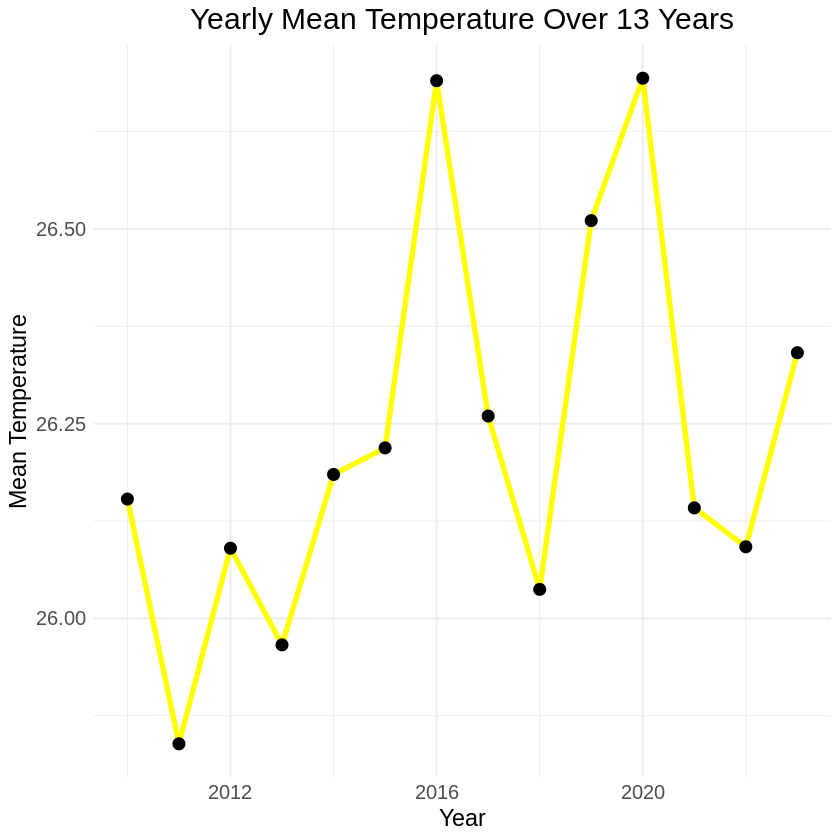

In [ ]:
ggplot(yearly_mean_temps, aes(x = as.integer(Year), y = Mean_Temperature)) +
  geom_line(aes(group = 1), color = "yellow", size = 1.5) +
  geom_point(color = "black", size = 3) +
  labs(title = "Yearly Mean Temperature Over 13 Years",
       x = "Year",
       y = "Mean Temperature") +
  theme_minimal() +
  theme(plot.title = element_text(size = 18, hjust = 0.5),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12))

shortwave_radiation_sum

In [ ]:
# Calculate yearly mean temperatures
yearly_mean_temps <- data %>%
  group_by(Year = format(time, "%Y")) %>%
  summarise(Mean_radiation = mean(shortwave_radiation_sum))

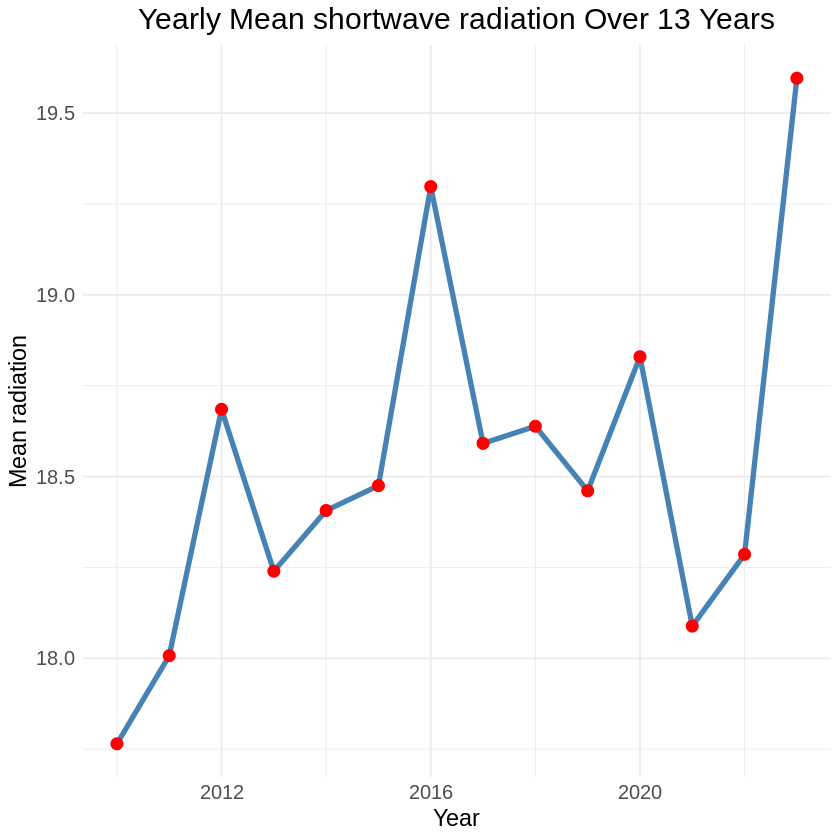

In [ ]:
ggplot(yearly_mean_temps, aes(x = as.integer(Year), y = Mean_radiation)) +
  geom_line(aes(group = 1), color = "steelblue", size = 1.5) +
  geom_point(color = "red", size = 3) +
  labs(title = "Yearly Mean shortwave radiation Over 13 Years",
       x = "Year",
       y = "Mean radiation") +
  theme_minimal() +
  theme(plot.title = element_text(size = 18, hjust = 0.5),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12))

In [ ]:
# Calculate yearly mean temperatures
yearly_mean_temps <- data %>%
  group_by(Year = format(time, "%Y")) %>%
  summarise(Mean_windspeed = mean(windspeed_10m_max))

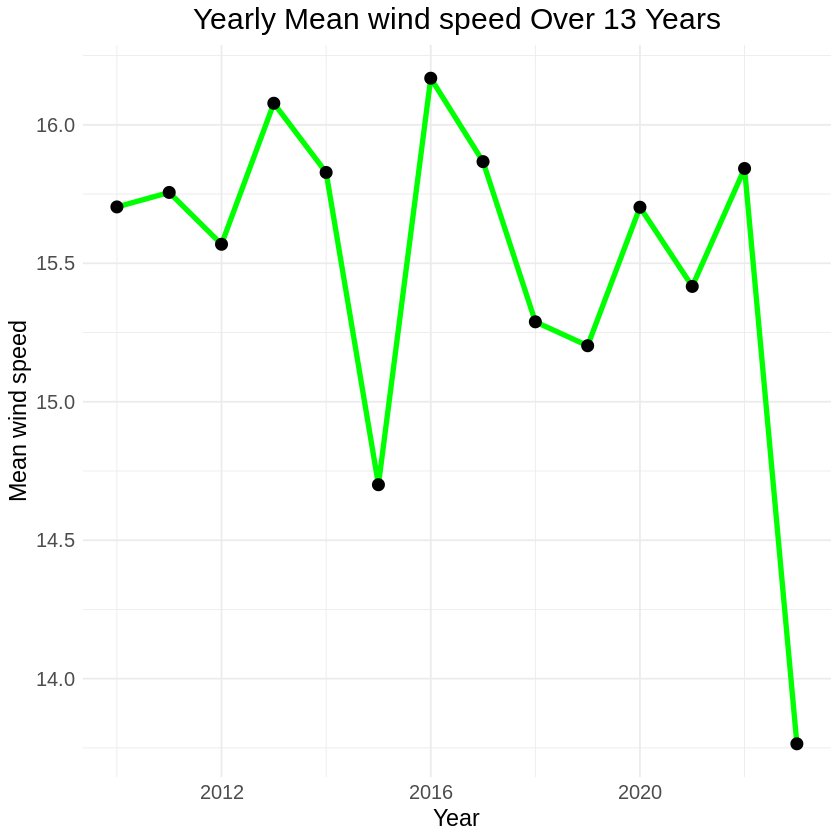

In [ ]:
ggplot(yearly_mean_temps, aes(x = as.integer(Year), y = Mean_windspeed)) +
  geom_line(aes(group = 1), color = "green", size = 1.5) +
  geom_point(color = "black", size = 3) +
  labs(title = "Yearly Mean wind speed Over 13 Years",
       x = "Year",
       y = "Mean wind speed") +
  theme_minimal() +
  theme(plot.title = element_text(size = 18, hjust = 0.5),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12))

In [ ]:
# Calculate yearly mean temperatures
yearly_mean_temps <- data %>%
  group_by(Year = format(time, "%Y")) %>%
  summarise(Mean_presipitation_hours = mean(precipitation_hours))


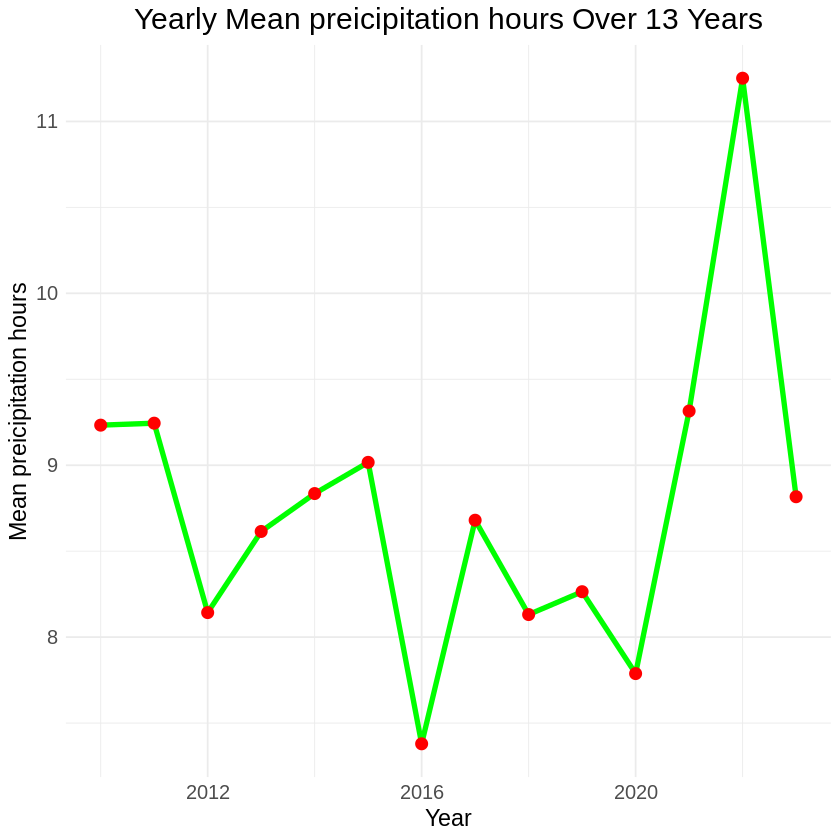

In [ ]:
ggplot(yearly_mean_temps, aes(x = as.integer(Year), y = Mean_presipitation_hours)) +
  geom_line(aes(group = 1), color = "green", size = 1.5) +
  geom_point(color = "red", size = 3) +
  labs(title = "Yearly Mean preicipitation hours Over 13 Years",
       x = "Year",
       y = "Mean preicipitation hours") +
  theme_minimal() +
  theme(plot.title = element_text(size = 18, hjust = 0.5),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12))

In [ ]:
# Calculate yearly mean temperatures
yearly_mean_temps <- data %>%
  group_by(Year = format(time, "%Y")) %>%
  summarise(Mean_windgusts = mean(windgusts_10m_max))

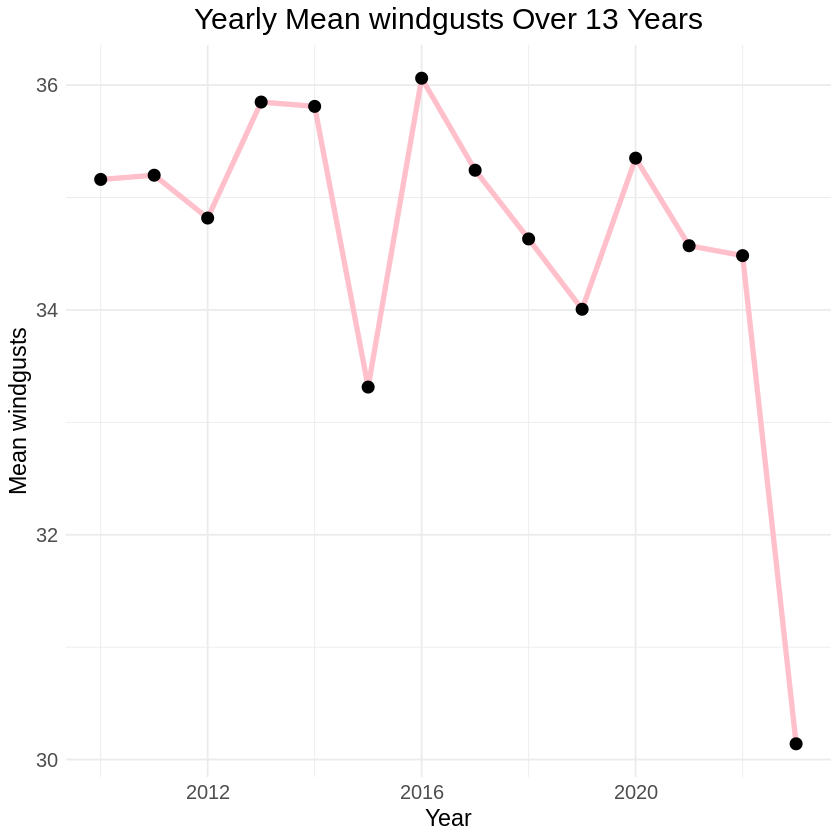

In [ ]:
ggplot(yearly_mean_temps, aes(x = as.integer(Year), y = Mean_windgusts)) +
  geom_line(aes(group = 1), color = "pink", size = 1.5) +
  geom_point(color = "black", size = 3) +
  labs(title = "Yearly Mean windgusts Over 13 Years",
       x = "Year",
       y = "Mean windgusts") +
  theme_minimal() +
  theme(plot.title = element_text(size = 18, hjust = 0.5),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12))

BoxPlot

Temperature

In [ ]:
# Calculate yearly mean temperatures for each city
yearly_mean_temps <- data %>%
  mutate(Year = format(time, "%Y")) %>%
  group_by(Year, city) %>%
  summarise(Mean_Temperature = mean(temperature_2m_mean))


`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.


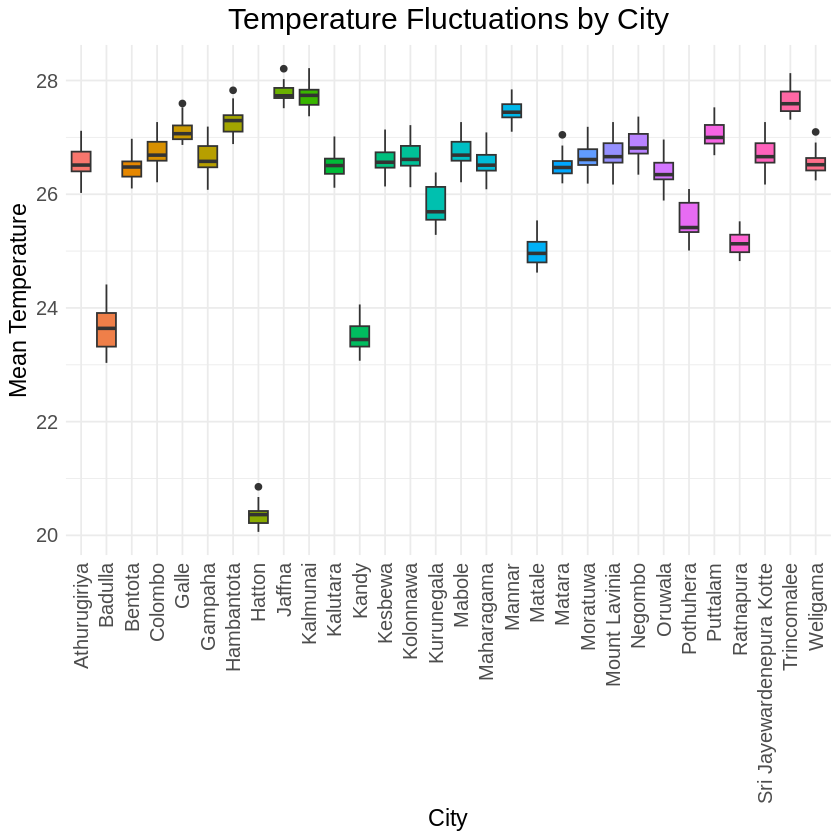

In [ ]:
# Create a boxplot for temperature fluctuations by city with vertical x-labels
ggplot(yearly_mean_temps, aes(x = city, y = Mean_Temperature, fill = city)) +
  geom_boxplot() +
  labs(title = "Temperature Fluctuations by City",
       x = "City",
       y = "Mean Temperature") +
  theme_minimal() +
  theme(plot.title = element_text(size = 18, hjust = 0.5),
        axis.title = element_text(size = 14),
        axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size = 12),  # Vertical x-labels
        axis.text.y = element_text(size = 12),
        legend.position = "none")

In [ ]:
# Calculate yearly mean temperatures for each city
yearly_mean_temps <- data %>%
  mutate(Year = format(time, "%Y")) %>%
  group_by(Year, city) %>%
  summarise(Mean_Temperature = mean(windspeed_10m_max))


`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.


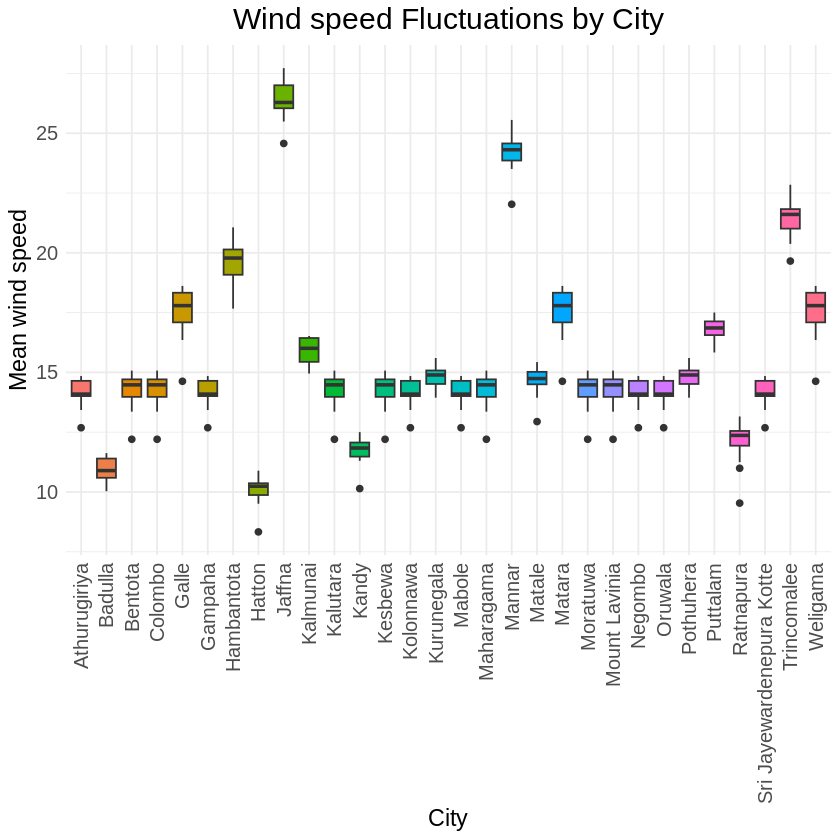

In [ ]:
# Create a boxplot for temperature fluctuations by city with vertical x-labels
ggplot(yearly_mean_temps, aes(x = city, y = Mean_Temperature, fill = city)) +
  geom_boxplot() +
  labs(title = "Wind speed Fluctuations by City",
       x = "City",
       y = "Mean wind speed") +
  theme_minimal() +
  theme(plot.title = element_text(size = 18, hjust = 0.5),
        axis.title = element_text(size = 14),
        axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size = 12),  # Vertical x-labels
        axis.text.y = element_text(size = 12),
        legend.position = "none")

In [ ]:
# Calculate yearly mean temperatures for each city
yearly_mean_temps <- data %>%
  mutate(Year = format(time, "%Y")) %>%
  group_by(Year, city) %>%
  summarise(Mean_Temperature = mean(precipitation_hours))


`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.


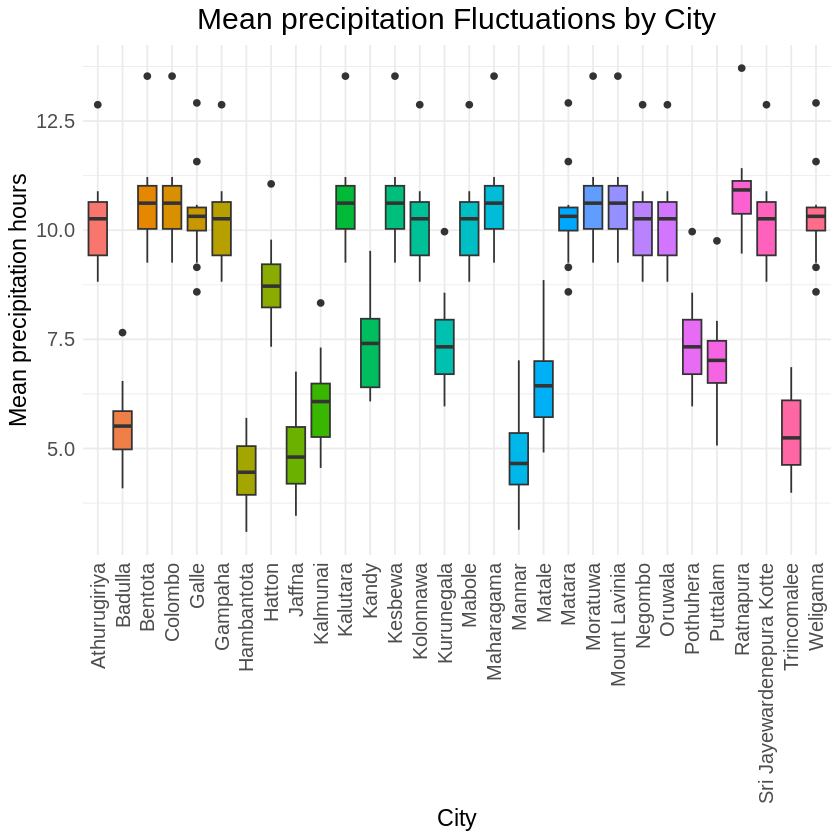

In [ ]:
# Create a boxplot for temperature fluctuations by city with vertical x-labels
ggplot(yearly_mean_temps, aes(x = city, y = Mean_Temperature, fill = city)) +
  geom_boxplot() +
  labs(title = "Mean precipitation Fluctuations by City",
       x = "City",
       y = "Mean precipitation hours") +
  theme_minimal() +
  theme(plot.title = element_text(size = 18, hjust = 0.5),
        axis.title = element_text(size = 14),
        axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size = 12),  # Vertical x-labels
        axis.text.y = element_text(size = 12),
        legend.position = "none")